**IMPORT LIBRERIE E DATASET**

In [71]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [72]:
path = "E:/Intenso/02 Data Science - Bicocca/03 II Anno/II Semestre/Industry Lab/19-20/DB Bosch"
df = pd.read_csv(os.path.join(path,"caso2_ALL_ESITI.csv"))

**ESPLORAZIONE DATASET**

In [73]:
df.shape

(296605, 33)

In [74]:
var_types = df.dtypes
var_types

Banco                                 object
CodiceDaLinea                         object
Programma                             object
Data_ora                              object
Data                                  object
Ora                                   object
Turno                                 object
Master                                object
coppia_max_ciclo                     float64
picco_coppia_zero                    float64
media_coppia_zero                    float64
picco_coppia_iniziale                float64
media_coppia_iniziale                float64
velocita_a_regime                    float64
picco_pressione_velocita_a_regime    float64
media_pressione_velocita_a_regime    float64
picco_portata_velocita_a_regime      float64
media_portata_velocita_a_regime      float64
velicita_1                           float64
picco_pressione_velocita_1           float64
media_pressione_velocita_1           float64
picco_portata_velocita_1             float64
media_port

In [75]:
df.head()

,Banco,CodiceDaLinea,Programma,Data_ora,Data,Ora,Turno,Master,coppia_max_ciclo,picco_coppia_zero,...,velocita_2,picco_pressione_velocita_2,media_pressione_velocita_2,picco_portata_velocita_2,media_portata_velocita_2,picco_coppia_finale,media_coppia_finale,Temperatura,n_esito,esito
0,BancoGP5,010160954163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:43:30,09/11/2016,15:43:30,B,,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,0.204679,0.143800,42.196945,100,PEZZO BUONO ...
1,BancoGP5,010160955163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:45:24,09/11/2016,15:45:24,B,,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,0.216845,0.118703,42.226974,100,PEZZO BUONO ...
2,BancoGP5,010160957163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:46:15,09/11/2016,15:46:15,B,,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,0.174554,0.122338,42.201241,100,PEZZO BUONO ...
3,BancoGP5,010160956163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:47:11,09/11/2016,15:47:11,B,,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,0.145885,0.103383,42.116058,100,PEZZO BUONO ...
4,BancoGP5,010160958163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:48:04,09/11/2016,15:48:04,B,,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,0.236076,0.149168,42.087067,100,PEZZO BUONO ...


In [76]:
df.describe()

,coppia_max_ciclo,picco_coppia_zero,media_coppia_zero,picco_coppia_iniziale,media_coppia_iniziale,velocita_a_regime,picco_pressione_velocita_a_regime,media_pressione_velocita_a_regime,picco_portata_velocita_a_regime,media_portata_velocita_a_regime,...,media_portata_velocita_1,velocita_2,picco_pressione_velocita_2,media_pressione_velocita_2,picco_portata_velocita_2,media_portata_velocita_2,picco_coppia_finale,media_coppia_finale,Temperatura,n_esito
count,296605.000000,296605.0,2.966050e+05,296605.0,296605.0,296605.000000,296605.000000,296605.000000,296605.000000,296605.000000,...,296605.000000,296605.000000,296605.0,296605.0,296605.0,296605.0,296605.000000,296605.000000,296605.000000,296605.000000
mean,0.009250,0.0,4.278898e-03,0.0,0.0,2300.037761,11.510206,11.309670,1303.164422,1298.153754,...,58.500435,499.990560,0.0,0.0,0.0,0.0,0.399962,0.197613,41.187810,100.700754
std,0.212485,0.0,3.649502e-03,0.0,0.0,6.144864,1.831713,1.800797,119.828814,120.075738,...,6.721527,1.943191,0.0,0.0,0.0,0.0,0.179777,0.061749,1.126921,9.808101
min,0.000000,0.0,1.294635e-08,0.0,0.0,2300.000000,0.000000,-0.011547,0.000000,0.000000,...,0.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,37.320004,1.000000
25%,0.000000,0.0,1.710183e-03,0.0,0.0,2300.000000,11.895733,11.679032,1325.647339,1320.957642,...,54.593998,500.000000,0.0,0.0,0.0,0.0,0.280196,0.160603,40.513451,100.000000
50%,0.000000,0.0,3.395009e-03,0.0,0.0,2300.000000,12.352711,12.124415,1350.899902,1346.076538,...,56.879986,500.000000,0.0,0.0,0.0,0.0,0.366345,0.193236,41.131039,100.000000
75%,0.000000,0.0,6.607929e-03,0.0,0.0,2300.000000,12.580805,12.365120,1364.400024,1359.144409,...,60.480015,500.000000,0.0,0.0,0.0,0.0,0.483601,0.229697,41.955624,100.000000
max,7.382427,0.0,4.996369e-02,0.0,0.0,3700.000000,17.255760,16.859419,11700.000000,11649.959961,...,90.000031,500.000000,0.0,0.0,0.0,0.0,5.080070,1.948498,49.100826,273.000000


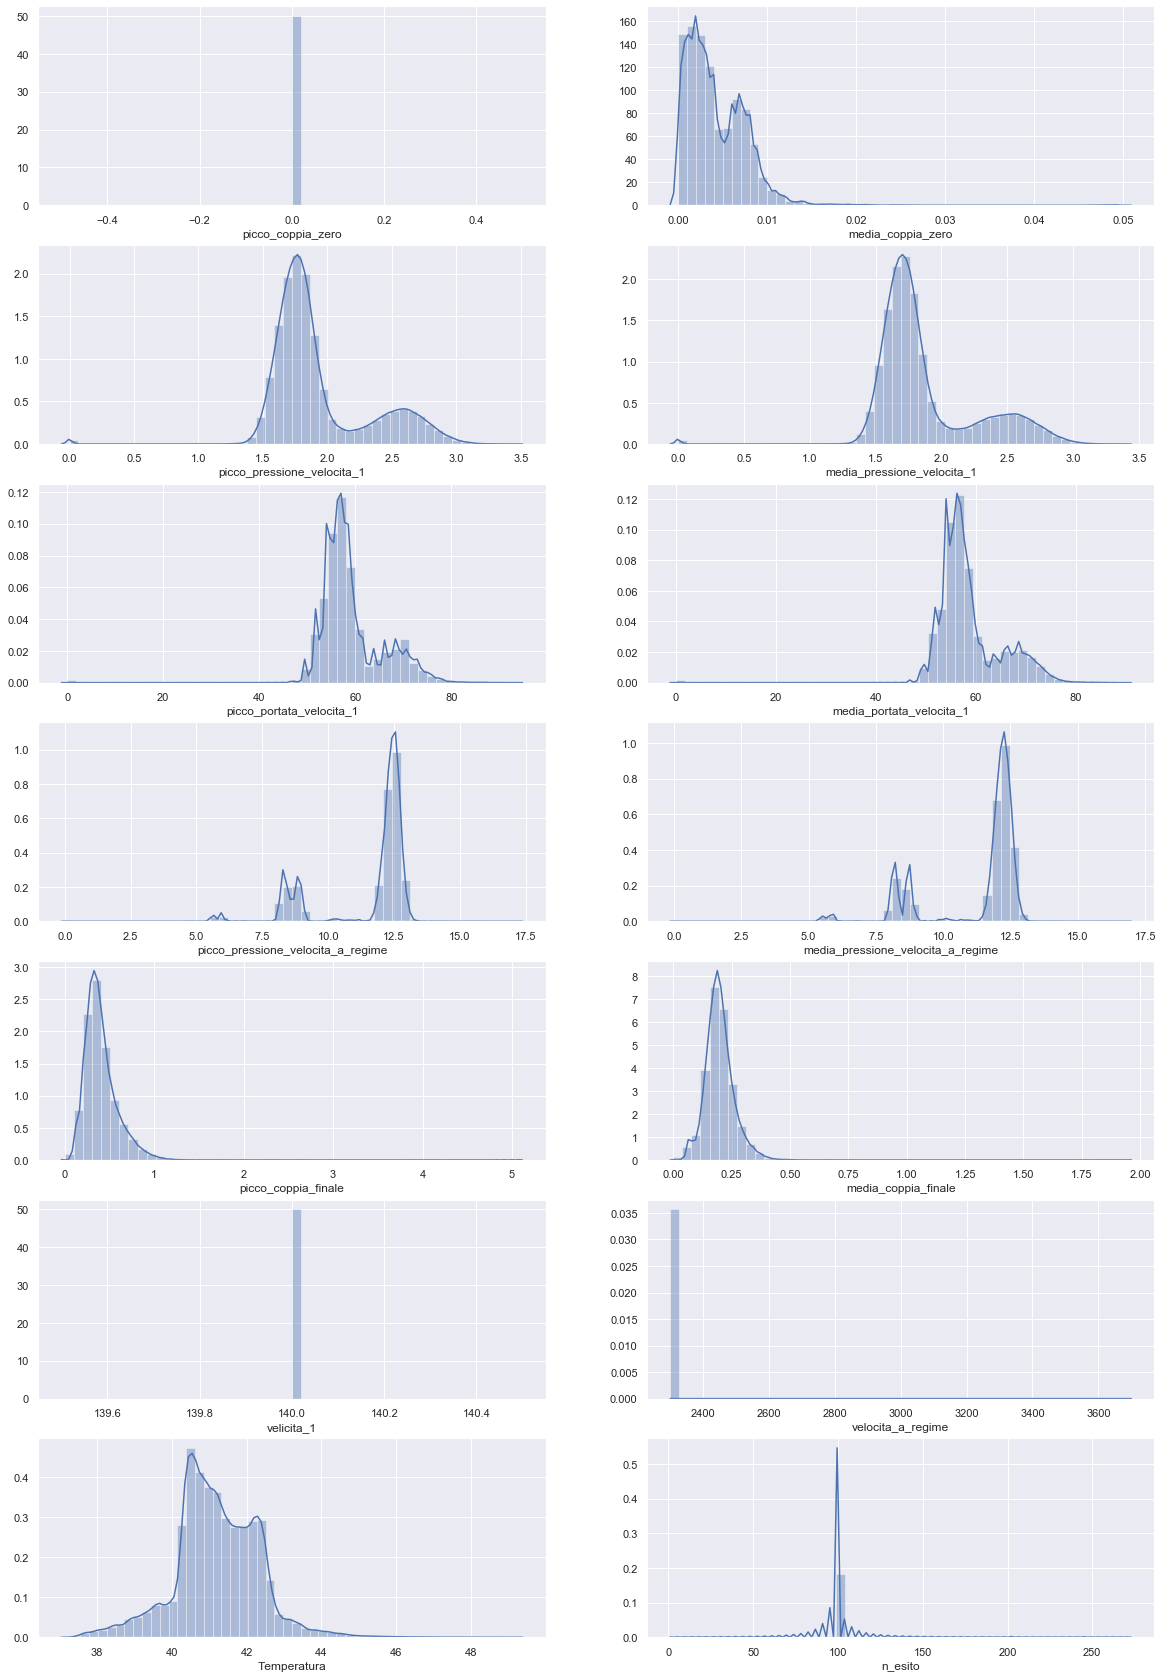

In [77]:
interested_vars = ['picco_coppia_zero', 'media_coppia_zero', 'picco_pressione_velocita_1', 'media_pressione_velocita_1',
                   'picco_portata_velocita_1', 'media_portata_velocita_1', 'picco_pressione_velocita_a_regime', 'media_pressione_velocita_a_regime',
                   'picco_coppia_finale', 'media_coppia_finale', 'velicita_1', 'velocita_a_regime', 'Temperatura', 'n_esito']
sns.set(color_codes=True)
fig, axes = plt.subplots(figsize=(20,30), nrows=int(len(interested_vars)/2+0.5), ncols=2)
for i, column in enumerate(interested_vars):
    sns.distplot(df[column], ax=axes[i//2, i%2])

**OVERVIEW PRELIMINARE SULLA RELAZIONE DI INTERESSE**

In [78]:
df = df.query("n_esito == 100")
df.corr()['media_pressione_velocita_a_regime']['media_portata_velocita_1']

-0.812209550018127

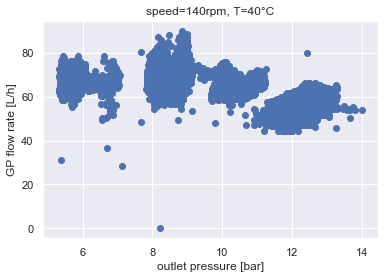

In [79]:
plt.scatter(df.media_pressione_velocita_a_regime, df.media_portata_velocita_1)
plt.title("speed=140rpm, T=40°C")
plt.xlabel("outlet pressure [bar]")
plt.ylabel("GP flow rate [L/h]")
plt.show()

**RICERCA E GESTIONE MISSING VALUES**

In [80]:
df.isnull().sum()

Banco                                   0
CodiceDaLinea                          35
Programma                               0
Data_ora                                0
Data                                    0
Ora                                     0
Turno                                1214
Master                                  0
coppia_max_ciclo                        0
picco_coppia_zero                       0
media_coppia_zero                       0
picco_coppia_iniziale                   0
media_coppia_iniziale                   0
velocita_a_regime                       0
picco_pressione_velocita_a_regime       0
media_pressione_velocita_a_regime       0
picco_portata_velocita_a_regime         0
media_portata_velocita_a_regime         0
velicita_1                              0
picco_pressione_velocita_1              0
media_pressione_velocita_1              0
picco_portata_velocita_1                0
media_portata_velocita_1                0
velocita_2                        

In [81]:
imp = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=' ')
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

In [82]:
sum(df.isnull().sum())

0

**DATA SCALING : STANDARDIZZAZIONE (probabilmente non serve)**

In [83]:
#scaler = StandardScaler()
#train, test = train_test_split(df, test_size=0.3)
#train.shape, test.shape

In [84]:
#for var in train:
    #if (var in interested_vars and var != "n_esito"):
        #train[var] = scaler.fit_transform(np.array(train[var]).reshape(-1, 1))
        #test[var] = scaler.transform(np.array(test[var]).reshape(-1, 1))
#df_scaled = pd.concat([train, test])
#df_scaled.shape

**RIMOZIONE OUTLIERS UNIVARIATI**

In [85]:
print(len(df))
for var in interested_vars:
    if (var != "n_esito" and df[var].std() != 0):
        df['zscore'] = pd.Series(np.abs(zscore(df[var])))
        df.drop(list(df.query("zscore > 3.5").index), inplace=True)
        df.drop("zscore", 1, inplace=True)
        print(var, len(df[var]))

294925
media_coppia_zero 293047
picco_pressione_velocita_1 293007
media_pressione_velocita_1 292946
picco_portata_velocita_1 292428
media_portata_velocita_1 292031
picco_pressione_velocita_a_regime 292030
media_pressione_velocita_a_regime 292030
picco_coppia_finale 290407
media_coppia_finale 289530
velocita_a_regime 289516
Temperatura 288698


In [86]:
df.shape

(288698, 33)

**OVERVIEW RELAZIONE DI INTERESSE**

In [92]:
#rimozione outliers bivariati
#migliorare!!!
df = df.query("media_portata_velocita_1 > 40")

In [93]:
for var in interested_vars:
    if var != "n_esito":
        df[var] = df[var].astype(float)

In [94]:
df.corr()['media_pressione_velocita_a_regime']['media_portata_velocita_1']

-0.8133308801795228

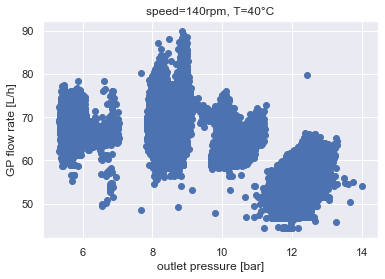

In [95]:
plt.scatter(df.media_pressione_velocita_a_regime, df.media_portata_velocita_1)
plt.title("speed=140rpm, T=40°C")
plt.xlabel("outlet pressure [bar]")
plt.ylabel("GP flow rate [L/h]")
plt.show()

**REGRESSIONE LINEARE SU TUTTO IL DATASET (DIVERSE CARATTERISTICHE DIMENSIONALI DI GEAR PUMP)**

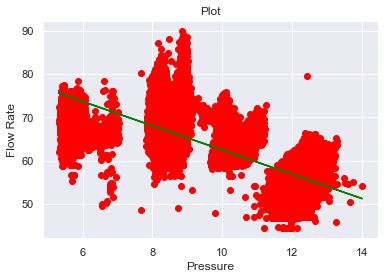

R^2 = 0.6615071206535479
GP theoretical flow rate = 90.50778609715897
Leakage coefficient = -2.8062313804653205


In [96]:
X = np.array(df.media_pressione_velocita_a_regime).reshape(-1, 1)
y = np.array(df.media_portata_velocita_1).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.scatter(X, y, color = "red")
plt.plot(X, reg.predict(X), color = "green")
plt.title("Plot")
plt.xlabel("Pressure")
plt.ylabel("Flow Rate")
plt.show()
print("R^2 =", reg.score(X, y))
print("GP theoretical flow rate =", reg.intercept_[0])
print("Leakage coefficient =", reg.coef_[0][0])

**CLUSTERING (OGNI CLUSTER RAGGRUPPA GEAR PUMP CON SIMILI CARATTERISTICHE DIMENSIONALI)**

In [97]:
dims = ['media_coppia_zero', 'media_coppia_finale']
X = np.array(df[dims])
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
kmeans.cluster_centers_

array([[0.00446552, 0.11859808],
       [0.00390478, 0.23311268],
       [0.00410406, 0.31744695],
       [0.00418939, 0.17908172]])

In [99]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts/len(df)))

{0: 0.17948069582325923,
 1: 0.30418366852099454,
 2: 0.09255128267300325,
 3: 0.423784352982743}

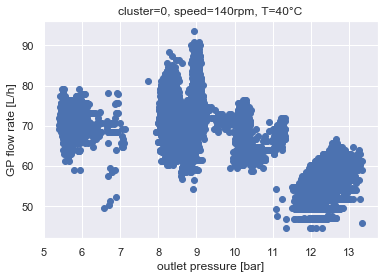

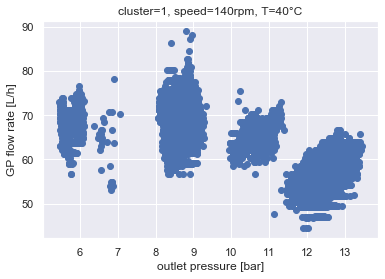

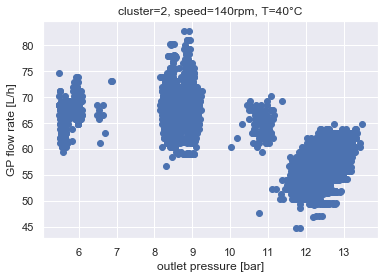

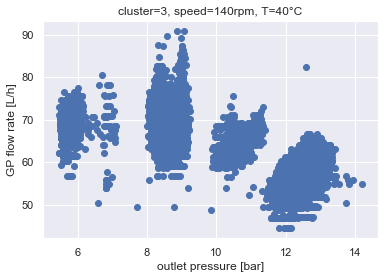

In [100]:
df['cluster'] = kmeans.labels_
for i in range(k):
    plt.scatter(df.query("cluster == " + str(i)).picco_pressione_velocita_a_regime, df.query("cluster == " + str(i)).picco_portata_velocita_1)
    plt.title("cluster=" + str(i) + ", speed=140rpm, T=40°C")
    plt.xlabel("outlet pressure [bar]")
    plt.ylabel("GP flow rate [L/h]")
    plt.show()

**VALUTO LEAKAGE COEFFICIENT MEDIANTE LINEAR REGRESSION**

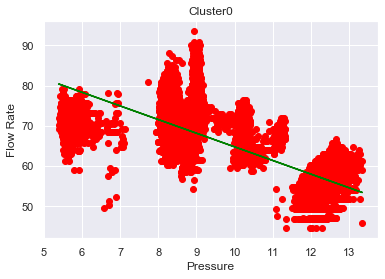

R^2 = 0.7556327291519773
GP flow rate = 98.66008344644334
Leakage coefficient = -3.388184061410666


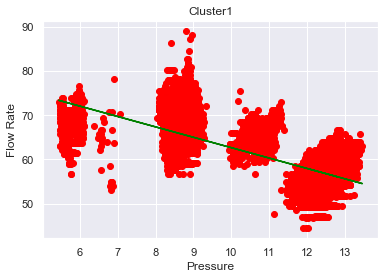

R^2 = 0.5613174932428655
GP flow rate = 86.1479709249688
Leakage coefficient = -2.348035731389765


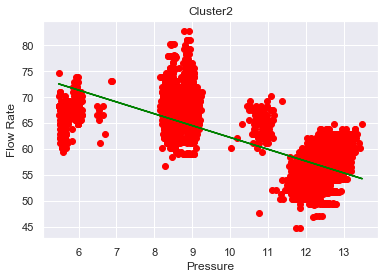

R^2 = 0.6153777677945134
GP flow rate = 85.06035628564042
Leakage coefficient = -2.281486328458242


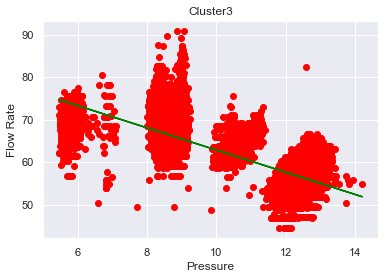

R^2 = 0.6006103703350054
GP flow rate = 88.96979794081045
Leakage coefficient = -2.613760965390307


In [101]:
for i in range(k):
    X = np.array(df.query("cluster == " + str(i)).picco_pressione_velocita_a_regime).reshape(-1, 1)
    y = np.array(df.query("cluster == " + str(i)).picco_portata_velocita_1).reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    plt.scatter(X, y, color = "red")
    plt.plot(X, reg.predict(X), color = "green")
    plt.title("Cluster" + str(i))
    plt.xlabel("Pressure")
    plt.ylabel("Flow Rate")
    plt.show()
    print("R^2 =", reg.score(X, y))
    print("GP flow rate =", reg.intercept_[0])
    print("Leakage coefficient =", reg.coef_[0][0])